In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from data_helper_fns import *

We utilize an OU process as random inputs. The stochastic differential equation (SDE) of an Ornstein–Uhlenbeck process is:


$$\mathrm{d} x_{t}=\theta\left(\mu-x_{t}\right) \mathrm{d} t+\sigma \mathrm{d} W_{t}$$
which can be discretized and approximated via


$$X_{n+1}=X_{n}+\theta\left(\mu-X_{n}\right) \Delta t+\sigma \Delta W_{n}$$

with
$$\Delta W_{n} \sim N(0, \Delta t)=\sqrt{\Delta t} N(0,1)$$

In [3]:
def is_constraint_violated(x):
    x0, x1 = x
    #potential = 0.5 * x1**2 - np.cos(x0)
    potential = 0.5*x1**2 - 0.5*x0**2 + 0.25*x0**4
    return potential > .99

def pendulum_dynamics(y, t, u):
    x1, x2 = y
    dydt = [x2, -np.sin(x1) + u[1]]
    return dydt

def duffing_dynamics(y, t, u):
    x1, x2 = y
    dydt = [x2, x1 - x1**3 + u[1]]
    return dydt

def toy_dynamics(y, t, u):
    x1, x2 = y
    dydt = [-0.05*x1, -1.*(x2 - x1**2) + u[1]**2]
    return dydt

To generate data, two functions are required: one which supplies `Data_Generator` with the derivative of the current state, another checks whether the current state violates system's constraints (returns `True` is constraints are violated).

In [4]:
N = 500
n_steps = 300
dt = 0.15

generator = Data_Generator(duffing_dynamics, dt, 2)

In [5]:
params = {
    "theta": 2,
    "sigma": 1,
    'keep_zero': True,
    "max_u": [0, 0],
    "max_x": [-1, 1]
}

data = generator.generate(N, n_steps, params, is_constraint_violated)
data.save('raw_data/duffing-large')

100%|██████████| 500/500 [00:36<00:00, 13.57it/s]


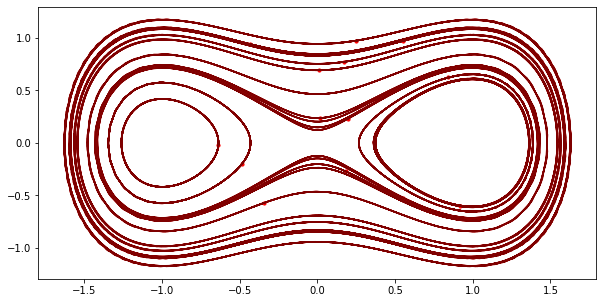

In [7]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.plot(data.xs[N+i, :, 0], data.xs[N+i, :, 1], color='r')
    plt.plot(data.xs[i, :, 0], data.xs[i, :, 1], color='k', alpha=0.5)
    plt.scatter(data.xs[N+i, 0, 0], data.xs[N+i, 0, 1], color='r', s=10)

In [2]:
us = np.load("raw_data/non-affine/toy_train_u.npy")

In [3]:
us.shape

(14000, 100, 2)

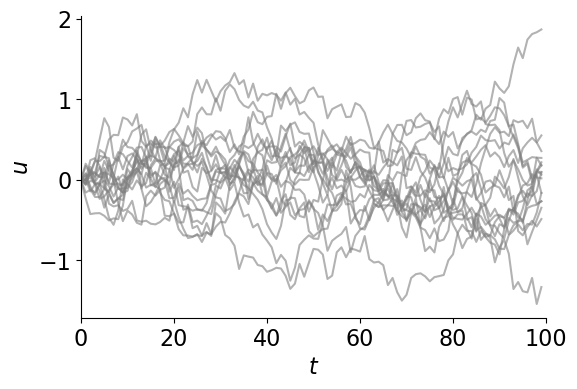

In [40]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, dpi=100)
for i in range(30):
    if np.sum(us[i, :, 1])!=0:
        ax.plot(us[i, :, 1], color='grey', alpha=0.6)
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([0, 100])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$u$')
plt.show()